<a href="https://colab.research.google.com/github/jtschowdary1812/EDA/blob/main/21BDS0042_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/GSS7402.csv"
df = pd.read_csv(data_url)

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rownames       9120 non-null   int64  
 1   kids           9120 non-null   int64  
 2   age            9120 non-null   int64  
 3   education      9120 non-null   int64  
 4   year           9120 non-null   int64  
 5   siblings       9120 non-null   int64  
 6   agefirstbirth  3312 non-null   float64
 7   ethnicity      9120 non-null   object 
 8   city16         9120 non-null   object 
 9   lowincome16    9120 non-null   object 
 10  immigrant      9120 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 783.9+ KB
None
          rownames         kids          age    education         year  \
count  9120.000000  9120.000000  9120.000000  9120.000000  9120.000000   
mean   4560.500000     2.076096    46.082018    12.635088  1990.288596   
std    2632.861561     1.80509

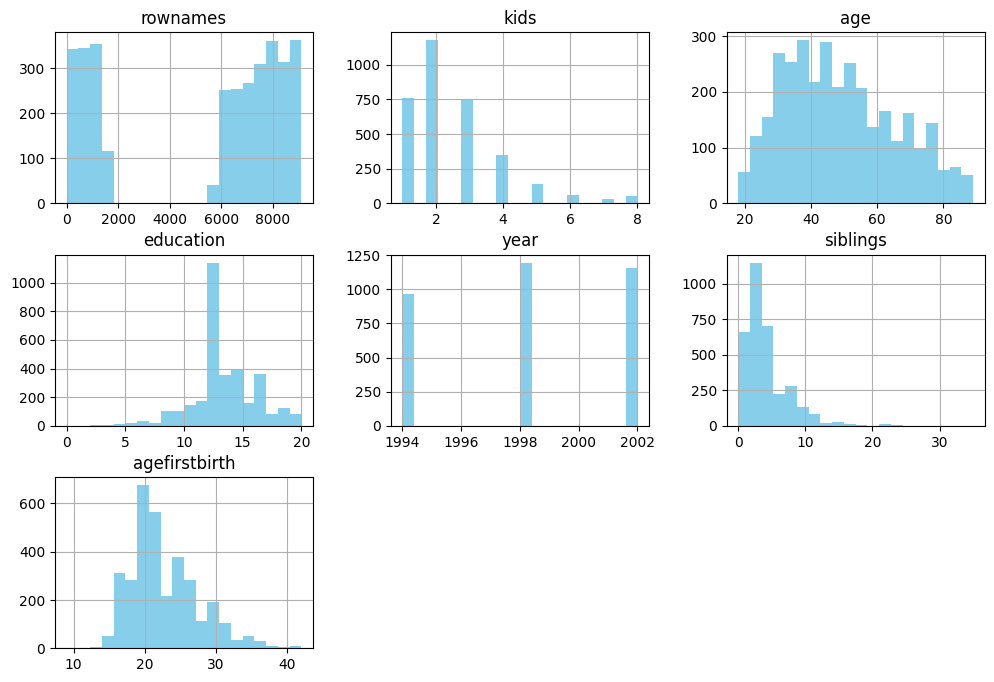

In [6]:
df.dropna(inplace=True)

num_cols = df.select_dtypes(include=['number']).columns
df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue')
plt.show()

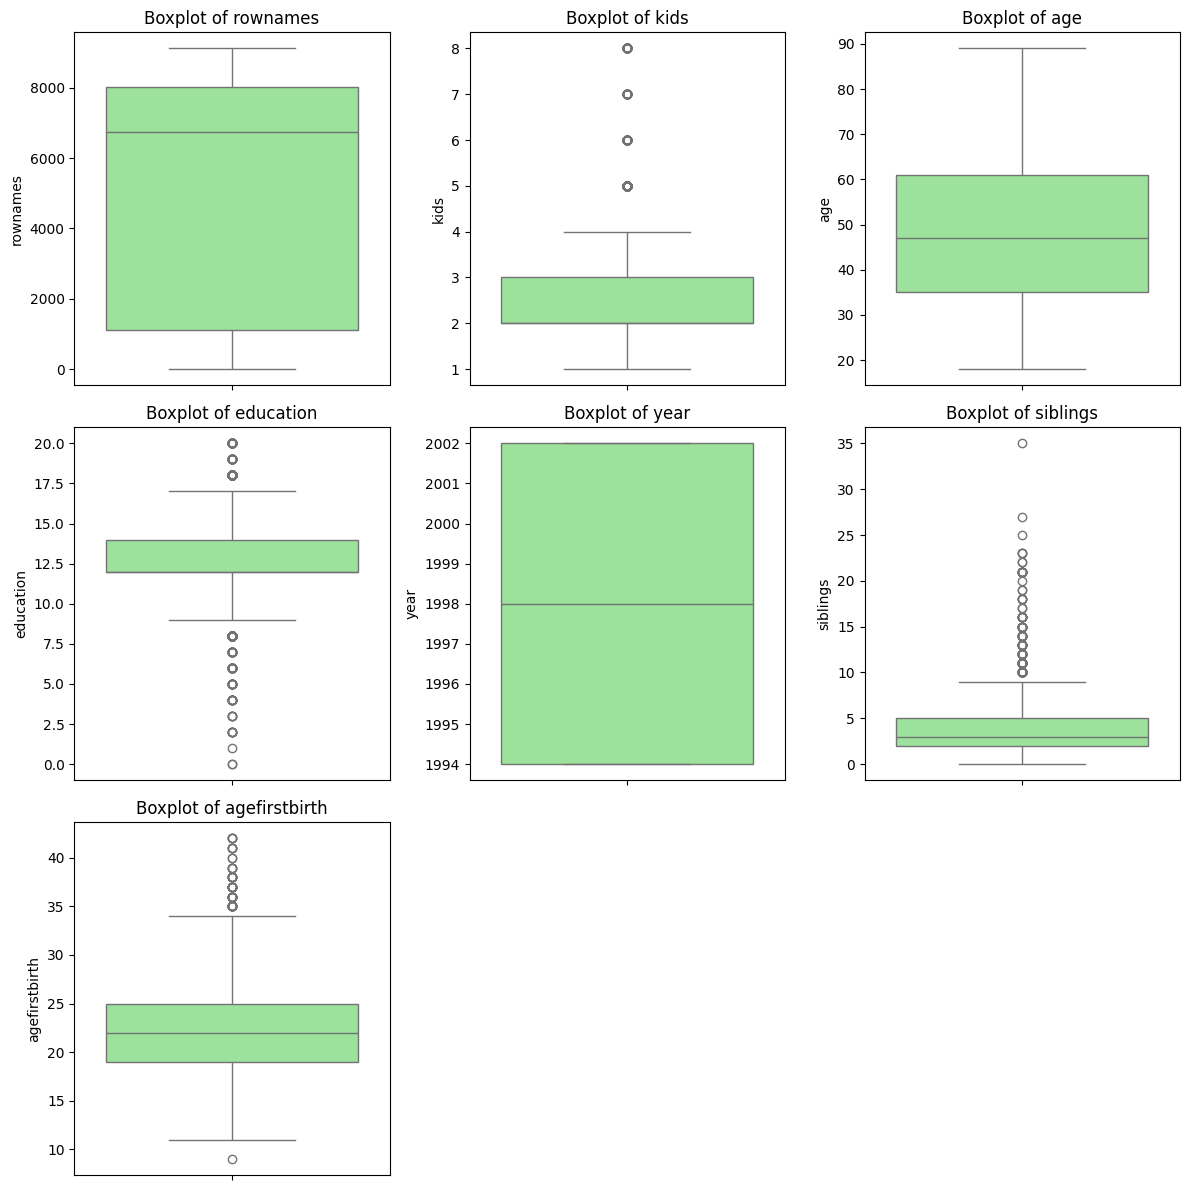

In [7]:
num_cols_count = len(num_cols)
rows = (num_cols_count // 3) + (num_cols_count % 3 > 0)
plt.figure(figsize=(12, 4 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


<ipython-input-8-f973118b46e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


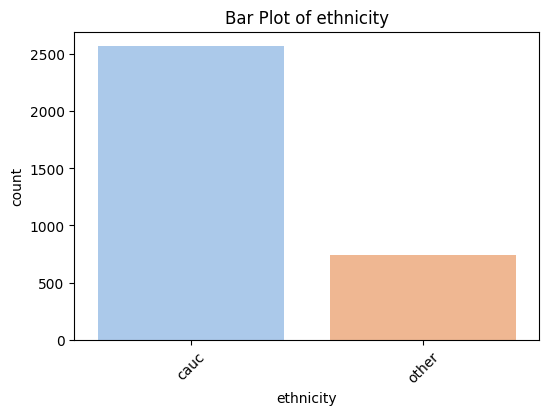

<ipython-input-8-f973118b46e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


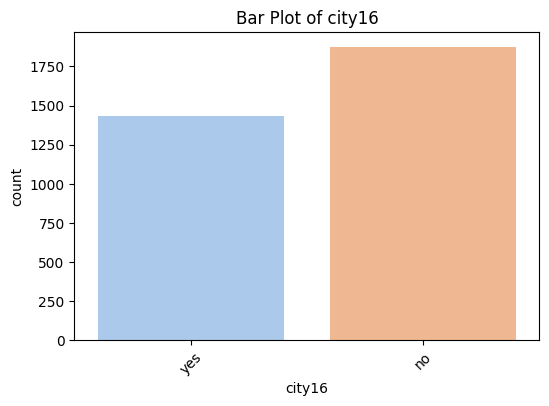

<ipython-input-8-f973118b46e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


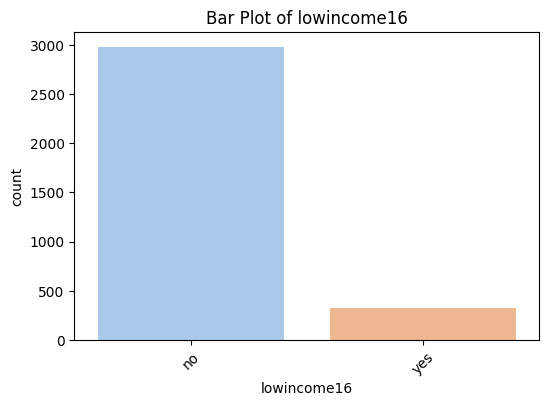

<ipython-input-8-f973118b46e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


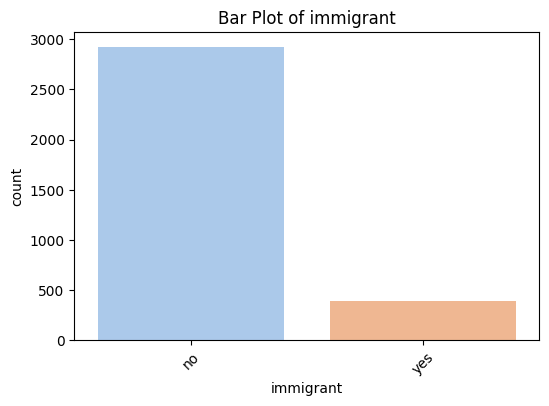

In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

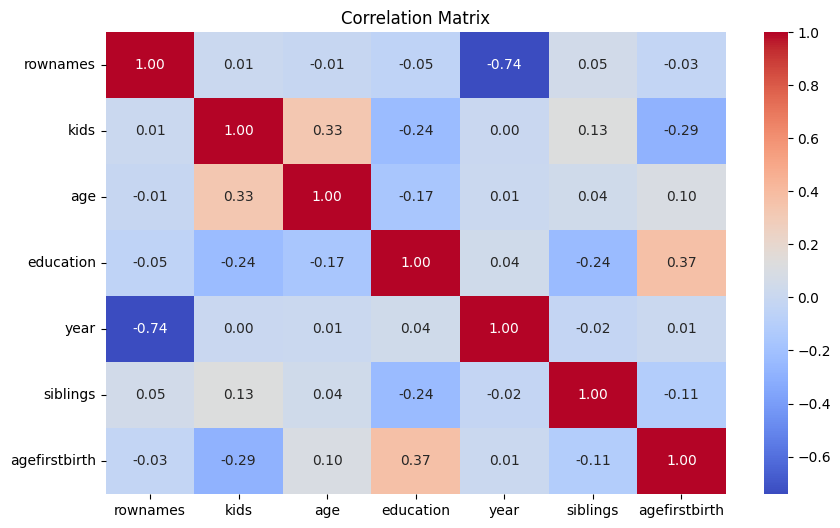

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

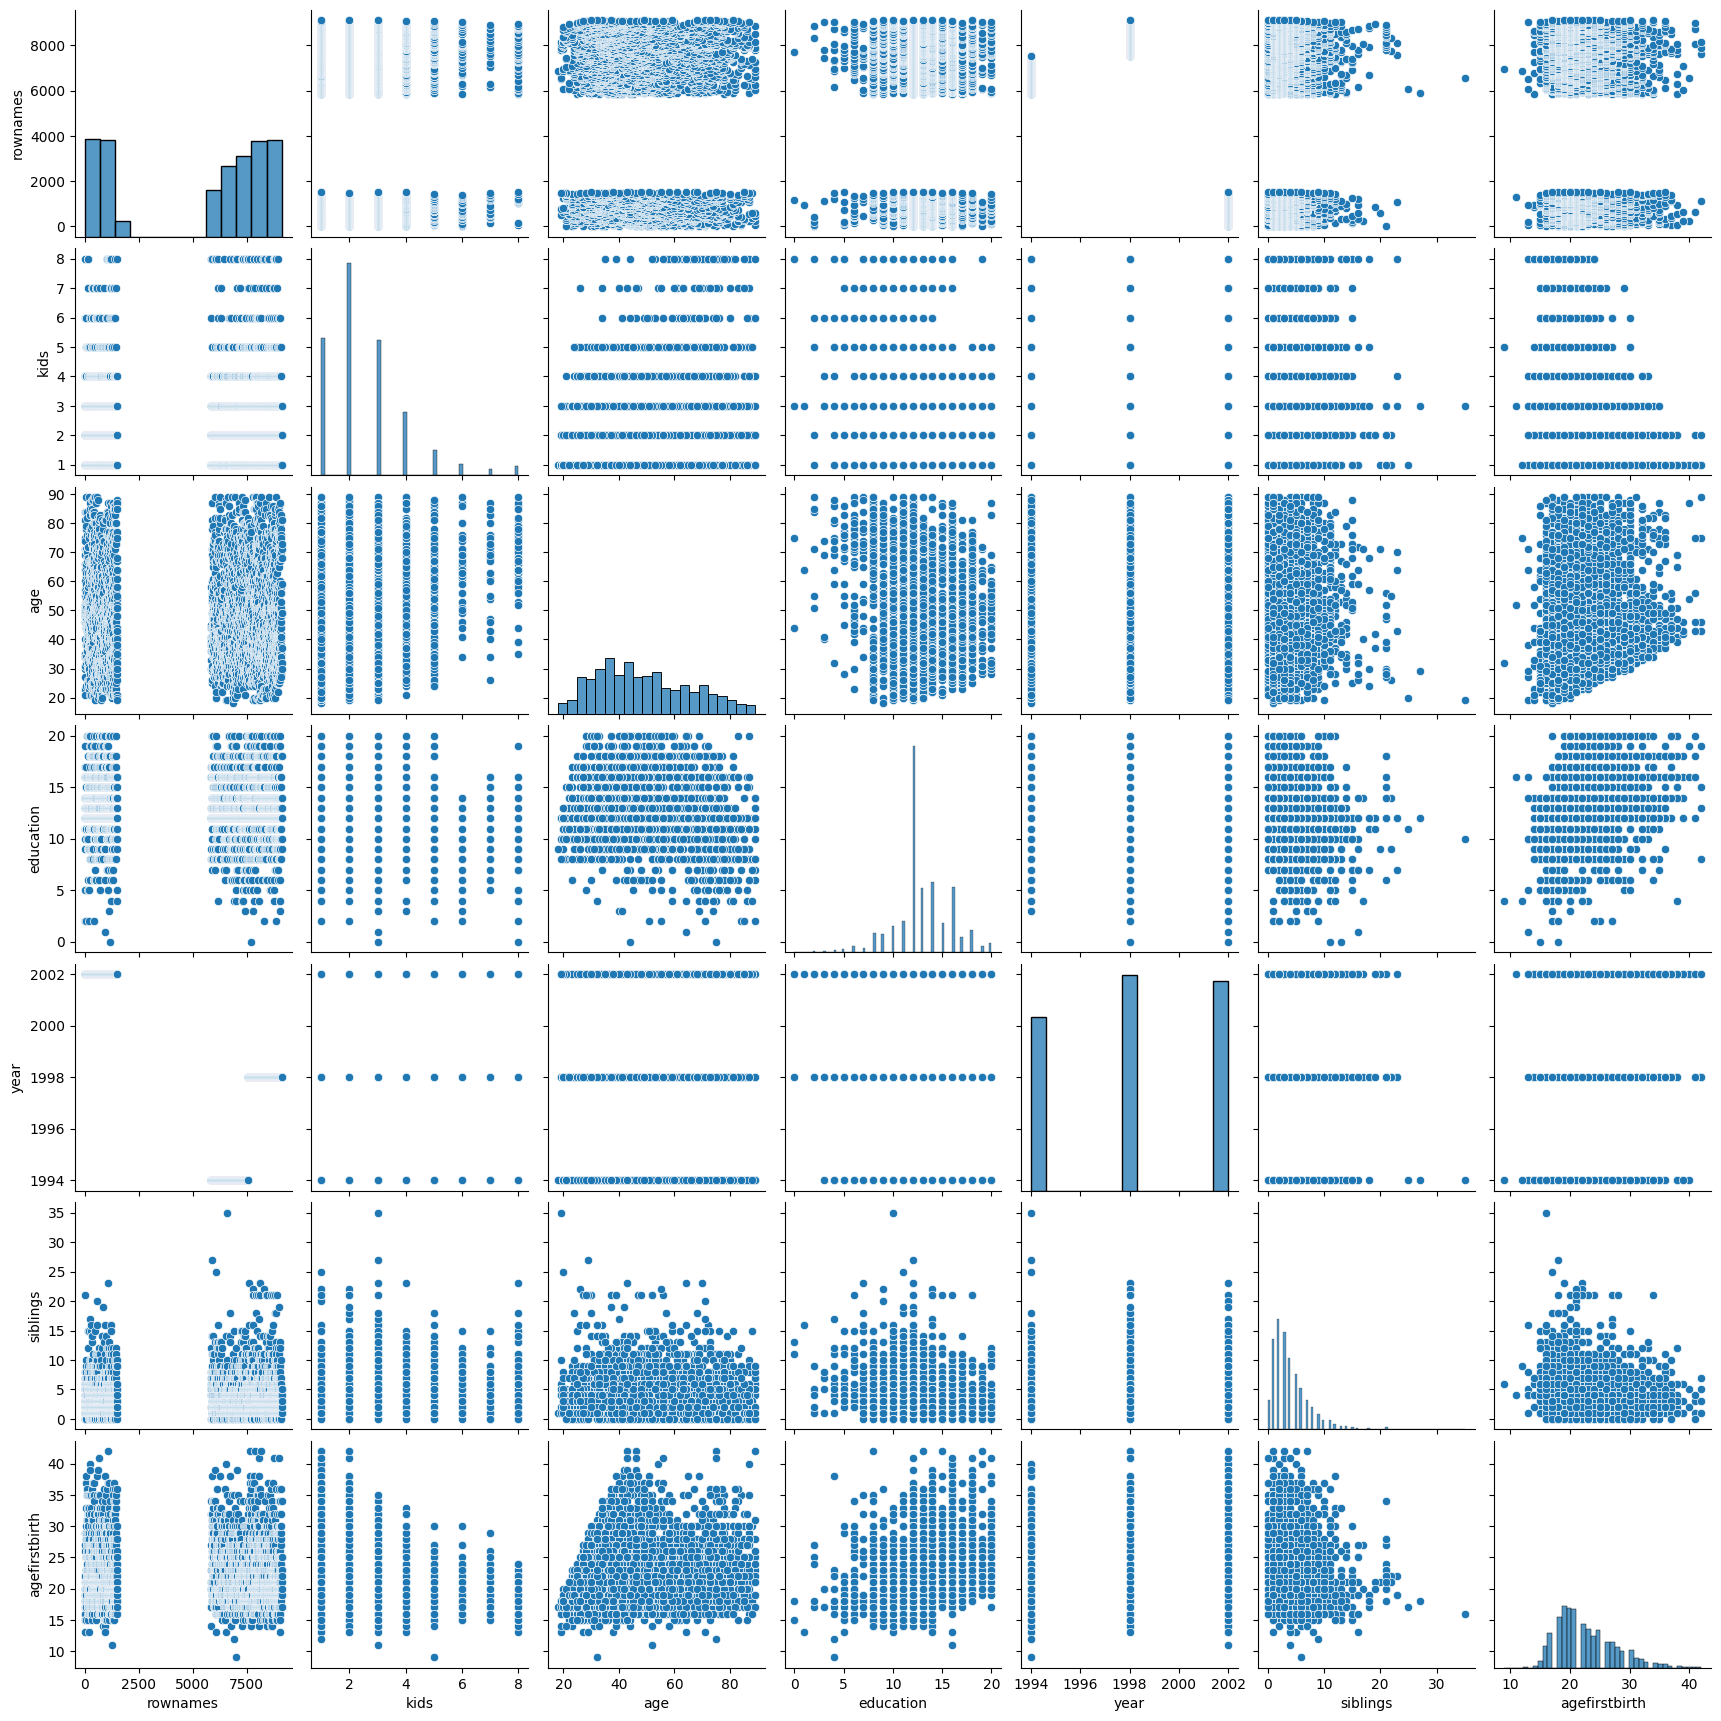

In [10]:
sns.pairplot(df[num_cols])
plt.show()

In [11]:

df.describe()



,rownames,kids,age,education,year,siblings,agefirstbirth
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5220.856582,2.554348,48.918176,12.896437,1998.235507,4.063708,22.630737
std,3359.107262,1.439426,16.823805,2.806746,3.191289,3.377648,4.859220
min,2.000000,1.000000,18.000000,0.000000,1994.000000,0.000000,9.000000
25%,1109.750000,2.000000,35.000000,12.000000,1994.000000,2.000000,19.000000
50%,6752.500000,2.000000,47.000000,12.000000,1998.000000,3.000000,22.000000
75%,8019.250000,3.000000,61.000000,14.000000,2002.000000,5.000000,25.000000
max,9119.000000,8.000000,89.000000,20.000000,2002.000000,35.000000,42.000000


In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import pairwise_distances
from scipy.stats import chi2_contingency
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
df.select_dtypes(include=[np.number]).describe()
df.select_dtypes(include=[np.number]).std()


,0
rownames,3359.107262
kids,1.439426
age,16.823805
education,2.806746
year,3.191289
siblings,3.377648
agefirstbirth,4.859220


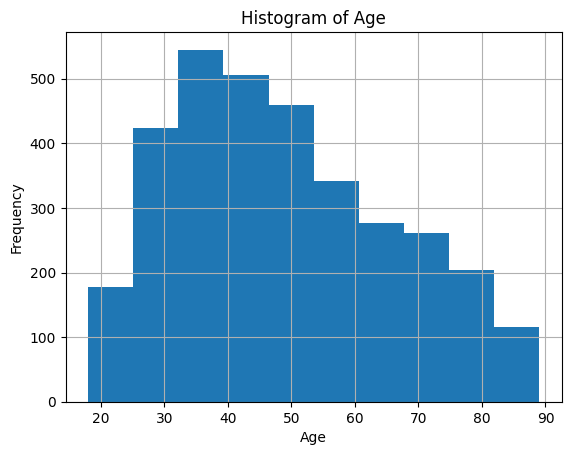

In [18]:
# Histogram
df['age'].hist(bins=10)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

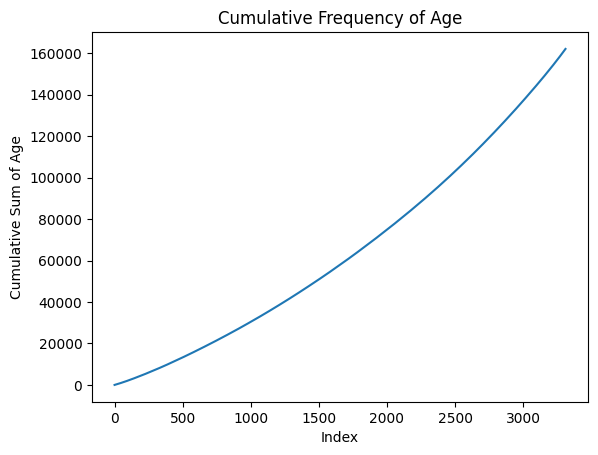

In [19]:
#Cumulative Frequency Distribution
df['age'].sort_values().reset_index(drop=True).cumsum().plot()
plt.title('Cumulative Frequency of Age')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum of Age')
plt.show()

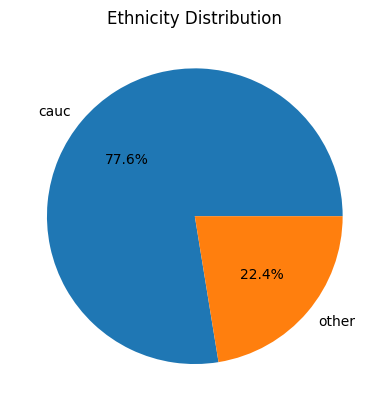

In [20]:
# Pie Plot
df['ethnicity'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Ethnicity Distribution')
plt.ylabel('')
plt.show()

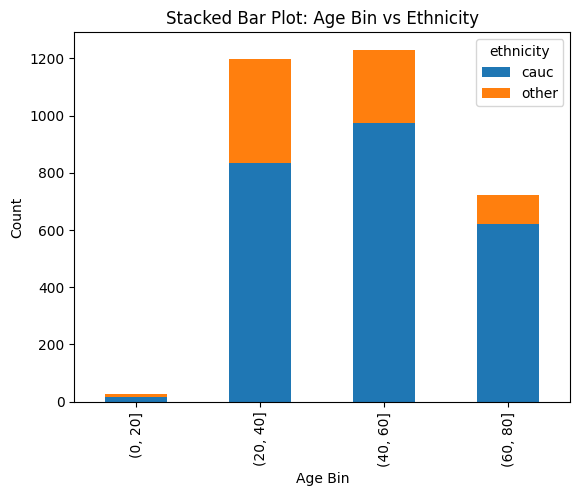

In [21]:
#Stacked Bar Plot of binned age
df['age_bin'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80])
pd.crosstab(df['age_bin'], df['ethnicity']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Age Bin vs Ethnicity')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.show()

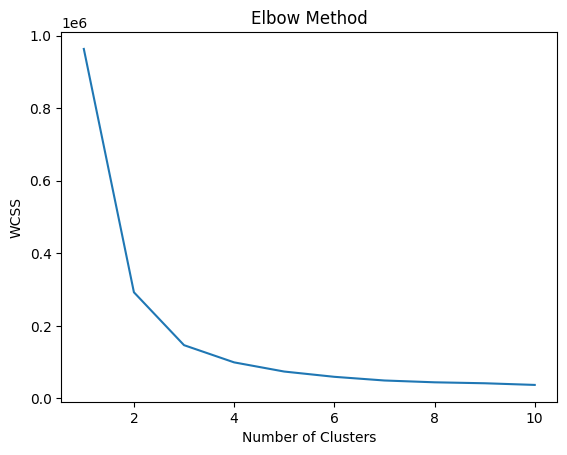

In [22]:
# Using the Elbow Method
X = df[['age', 'education']].dropna()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# Fit K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

In [25]:
#  Distance Calculation
dist_matrix = pairwise_distances(X, metric='euclidean')

In [26]:
#  Prepare Dataset
X = df[['age', 'education']].dropna()

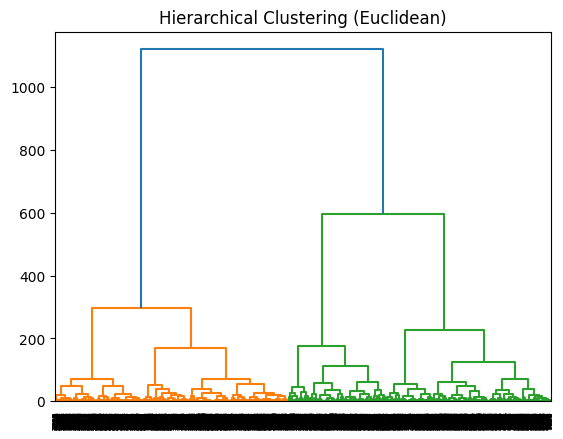

In [27]:
# Euclidean Distance Dendrogram
linked = linkage(X, method='ward', metric='euclidean')
dendrogram(linked)
plt.title('Hierarchical Clustering (Euclidean)')
plt.show()

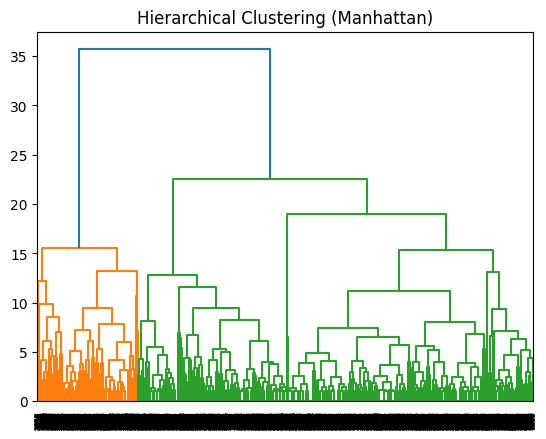

In [29]:
# Manhattan Distance Dendrogram
linked = linkage(X, method='average', metric='cityblock')
dendrogram(linked)
plt.title('Hierarchical Clustering (Manhattan)')
plt.show()


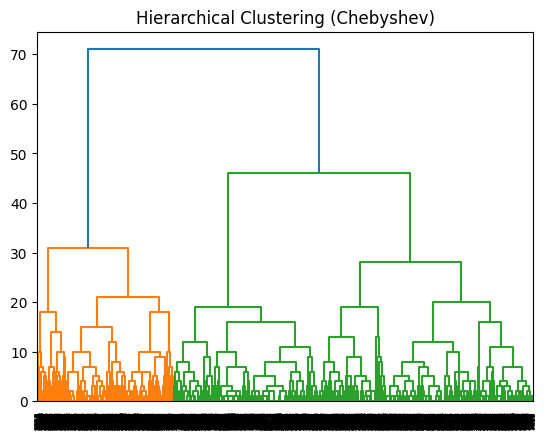

In [30]:

# Chebyshev Distance Dendrogram
linked = linkage(X, method='complete', metric='chebyshev')
dendrogram(linked)
plt.title('Hierarchical Clustering (Chebyshev)')
plt.show()

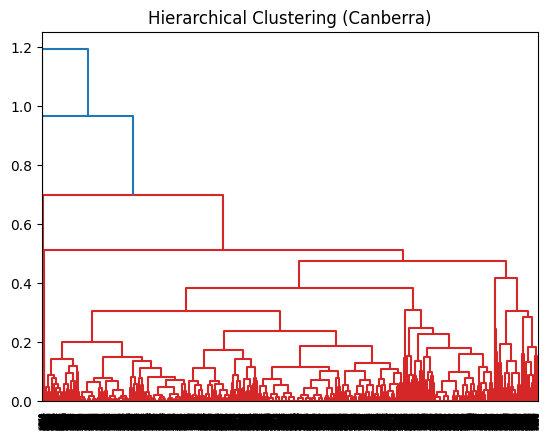

In [31]:

#  Canberra Distance Dendrogram
linked = linkage(X, method='average', metric='canberra')
dendrogram(linked)
plt.title('Hierarchical Clustering (Canberra)')
plt.show()

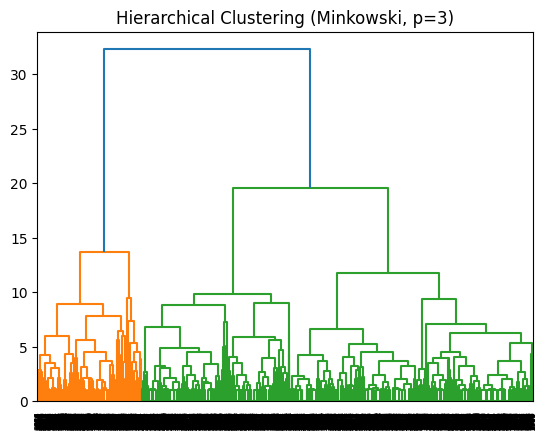

In [33]:
# Minkowski Distance Dendrogram (p=3)
distance_matrix = pdist(X, metric='minkowski', p=3)
linked = linkage(distance_matrix, method='average')
dendrogram(linked)
plt.title('Hierarchical Clustering (Minkowski, p=3)')
plt.show()


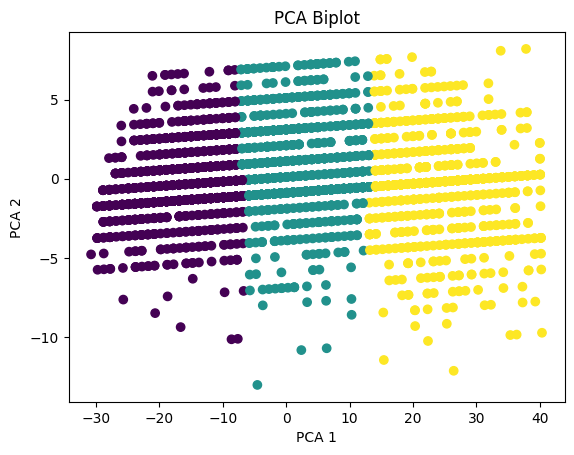

In [34]:
# PCA Biplot
pca = PCA(n_components=2)
components = pca.fit_transform(X)
plt.scatter(components[:, 0], components[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Biplot')
plt.show()

In [35]:
# Data Cleaning and Preprocessing
df_clean = df[['age', 'education', 'kids']].dropna()

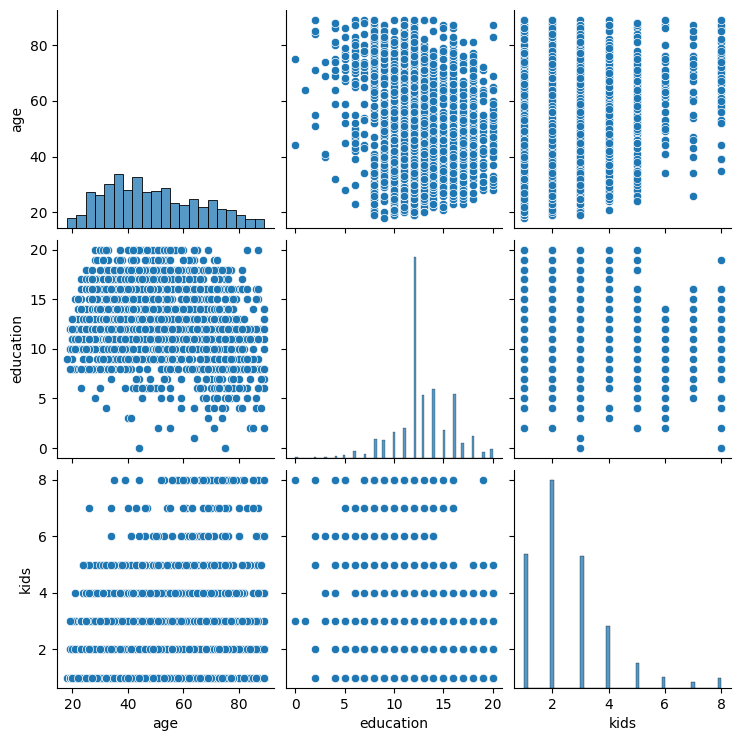

In [36]:
#  Explore Relationships
sns.pairplot(df_clean)
plt.show()

In [37]:
# Train/Test Split
X = df_clean[['education']]
y = df_clean['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#  Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 62.48405555918717
Coefficient: [-1.05170711]


In [39]:
#  Multiple Linear Regression
X_multi = df_clean[['education', 'kids']]
y_multi = df_clean['age']
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
mlr = LinearRegression()
mlr.fit(X_train, y_train)
print("Intercept:", mlr.intercept_)
print("Coefficients:", mlr.coef_)

Intercept: 48.18318140572503
Coefficients: [-0.63344746  3.51021784]


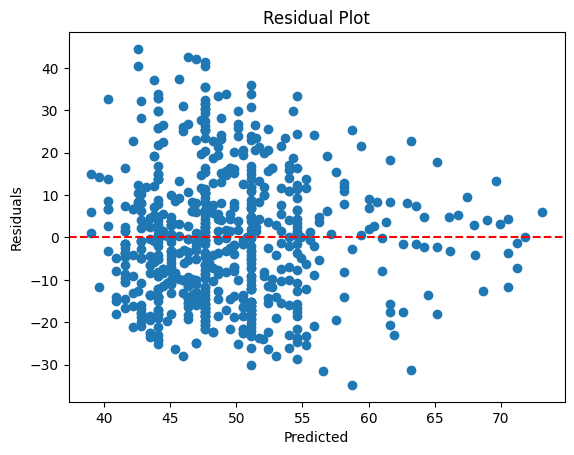

In [40]:
# Residual Analysis
y_pred = mlr.predict(X_test)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
